In [1]:
import pandas as pd
import glob
import os

# 시트 번호 및 정확한 폴더명 매핑 (띄어쓰기 제거 + 경로 반영)
table_paths = {
    "1.회원정보": "data/train/1.회원정보",
    "2.신용정보": "data/train/2.신용정보",
    "3.승인매출정보": "data/train/3.승인매출정보",
    "4.청구입금정보": "data/train/4.청구입금정보",
    "5.잔액정보": "data/train/5.잔액정보",
    "6.채널정보": "data/train/6.채널정보",
    "7.마케팅정보": "data/train/7.마케팅정보",
    "8.성과정보": "data/train/8.성과정보"
}

# 결과 저장용 딕셔너리
merged_data = {}

# 각 테이블 통합
for name, path in table_paths.items():
    files = glob.glob(os.path.join(path, "*.parquet"))
    if len(files) > 0:
        df = pd.concat([pd.read_parquet(f) for f in sorted(files)], ignore_index=True)
        merged_data[name] = df
        print(f"{name} ✅ 불러오기 완료: {df.shape}")
    else:
        print(f"{name} ⚠️ 파일 없음")

# 예시: 성과정보 테이블 미리 보기
merged_data["8.성과정보"].head()

1.회원정보 ✅ 불러오기 완료: (2400000, 78)
2.신용정보 ✅ 불러오기 완료: (2400000, 42)
3.승인매출정보 ✅ 불러오기 완료: (2400000, 406)
4.청구입금정보 ✅ 불러오기 완료: (2400000, 46)
5.잔액정보 ✅ 불러오기 완료: (2400000, 82)
6.채널정보 ✅ 불러오기 완료: (2400000, 105)
7.마케팅정보 ✅ 불러오기 완료: (2400000, 64)
8.성과정보 ✅ 불러오기 완료: (2400000, 49)


,기준년월,ID,증감율_이용건수_신용_전월,증감율_이용건수_신판_전월,증감율_이용건수_일시불_전월,증감율_이용건수_할부_전월,증감율_이용건수_CA_전월,증감율_이용건수_체크_전월,증감율_이용건수_카드론_전월,증감율_이용금액_신용_전월,...,변동률_RV일시불평잔,변동률_할부평잔,변동률_CA평잔,변동률_RVCA평잔,변동률_카드론평잔,변동률_잔액_B1M,변동률_잔액_일시불_B1M,변동률_잔액_CA_B1M,혜택수혜율_R3M,혜택수혜율_B0M
0,201807,TRAIN_000000,0.454548,0.454548,0.364727,1.999996,0.0,0.0,0.0,0.409766,...,0.999998,1.042805,0.999700,0.999998,0.999998,0.261886,0.270752,0.000000,1.044401,1.280543
1,201807,TRAIN_000001,-0.511808,-0.511808,-0.511808,0.000000,0.0,0.0,0.0,-1.010817,...,1.092698,0.905663,0.999998,0.999998,0.999998,-0.563388,-0.670348,0.000000,0.000000,0.000000
2,201807,TRAIN_000002,-0.062716,-0.062716,0.067843,-1.999996,0.0,0.0,0.0,-0.902166,...,1.006124,1.993590,0.852567,0.999998,0.999998,-0.046516,0.058114,-0.014191,0.524159,1.208420
3,201807,TRAIN_000003,0.135707,0.135707,0.153975,-1.999996,0.0,0.0,0.0,-0.866052,...,0.999998,1.050646,0.999877,0.999998,0.999998,0.023821,0.258943,0.000000,0.880925,1.657124
4,201807,TRAIN_000004,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000028,...,0.999998,0.999998,0.999998,0.999998,0.999998,0.000000,0.000000,0.000000,NaN,NaN


In [2]:
# 청구입금정보정보 시트를 새로운 변수에 넣는다.
bill_df = merged_data["4.청구입금정보"]

# 도수분포 확인
bill_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 46 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   기준년월              int64 
 1   ID                object
 2   대표결제일             int64 
 3   대표결제방법코드          object
 4   대표청구지고객주소구분코드     object
 5   대표청구서수령지구분코드      object
 6   청구서수령방법           object
 7   청구서발송여부_B0        int64 
 8   청구서발송여부_R3M       int64 
 9   청구서발송여부_R6M       int64 
 10  청구금액_B0           int64 
 11  청구금액_R3M          int64 
 12  청구금액_R6M          int64 
 13  포인트_마일리지_건별_B0M   int64 
 14  포인트_마일리지_건별_R3M   int64 
 15  포인트_포인트_건별_B0M    int64 
 16  포인트_포인트_건별_R3M    int64 
 17  포인트_마일리지_월적립_B0M  int64 
 18  포인트_마일리지_월적립_R3M  int64 
 19  포인트_포인트_월적립_B0M   int64 
 20  포인트_포인트_월적립_R3M   int64 
 21  포인트_적립포인트_R12M    int64 
 22  포인트_적립포인트_R3M     int64 
 23  포인트_이용포인트_R12M    int64 
 24  포인트_이용포인트_R3M     int64 
 25  포인트_잔여포인트_B0M     int64 
 26  마일_적립포인트_R12M     int64 
 27  마일_적립포인트_R3M

In [3]:
# 결측치 확인
bill_df.isna().sum()

기준년월                0
ID                  0
대표결제일               0
대표결제방법코드            0
대표청구지고객주소구분코드       0
대표청구서수령지구분코드        0
청구서수령방법             0
청구서발송여부_B0          0
청구서발송여부_R3M         0
청구서발송여부_R6M         0
청구금액_B0             0
청구금액_R3M            0
청구금액_R6M            0
포인트_마일리지_건별_B0M     0
포인트_마일리지_건별_R3M     0
포인트_포인트_건별_B0M      0
포인트_포인트_건별_R3M      0
포인트_마일리지_월적립_B0M    0
포인트_마일리지_월적립_R3M    0
포인트_포인트_월적립_B0M     0
포인트_포인트_월적립_R3M     0
포인트_적립포인트_R12M      0
포인트_적립포인트_R3M       0
포인트_이용포인트_R12M      0
포인트_이용포인트_R3M       0
포인트_잔여포인트_B0M       0
마일_적립포인트_R12M       0
마일_적립포인트_R3M        0
마일_이용포인트_R12M       0
마일_이용포인트_R3M        0
마일_잔여포인트_B0M        0
할인건수_R3M            0
할인금액_R3M            0
할인건수_B0M            0
할인금액_B0M            0
할인금액_청구서_R3M        0
할인금액_청구서_B0M        0
상환개월수_결제일_R6M       0
상환개월수_결제일_R3M       0
선결제건수_R6M           0
선결제건수_R3M           0
연체건수_R6M            0
연체건수_R3M            0
혜택수혜금액_R3M          0
포인트_마일리지_환산_B0M     0
혜택수혜금액    

### 세그먼트 불러오기

In [5]:
# 새로운 변수에 지정해서 만들어준다.
member_df = merged_data["1.회원정보"]

# 1. 필요한 컬럼만 추출 (ID, Segment)
segment_df = member_df[['ID', 'Segment']].drop_duplicates(subset='ID')

# 2. ID 기준으로 credit_df에 병합
bill_df_with_segment = pd.merge(bill_df, segment_df, on='ID', how='left')

# 3. 결과 확인
print(f"병합 후 행 수: {len(bill_df_with_segment)}")
print(f"Segment 컬럼 결측치 수: {bill_df_with_segment['Segment'].isnull().sum()}")

병합 후 행 수: 2400000
Segment 컬럼 결측치 수: 0


In [6]:
bill_df_with_segment

,기준년월,ID,대표결제일,대표결제방법코드,대표청구지고객주소구분코드,대표청구서수령지구분코드,청구서수령방법,청구서발송여부_B0,청구서발송여부_R3M,청구서발송여부_R6M,...,상환개월수_결제일_R6M,상환개월수_결제일_R3M,선결제건수_R6M,선결제건수_R3M,연체건수_R6M,연체건수_R3M,혜택수혜금액_R3M,포인트_마일리지_환산_B0M,혜택수혜금액,Segment
0,201807,TRAIN_000000,27,자동이체,미확인,당사페이앱+이메일,문자메세지,1,1,1,...,5,3,0,0,1,0,3,0,0,D
1,201807,TRAIN_000001,13,자동이체,주거지,우편,우편,1,1,1,...,6,3,0,0,0,0,0,0,0,E
2,201807,TRAIN_000002,1,자동이체,미확인,이메일,이메일,1,1,1,...,6,3,0,0,0,0,121,0,50,C
3,201807,TRAIN_000003,5,자동이체,주거지,우편,우편,1,1,1,...,5,3,2,0,0,0,3,0,2,D
4,201807,TRAIN_000004,13,자동이체,주거지,우편,우편,0,1,1,...,1,1,0,0,0,0,0,0,0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,25,자동이체,주거지,우편,우편,0,0,0,...,0,0,0,0,0,0,0,0,0,E
2399996,201812,TRAIN_399996,20,자동이체,미확인,이메일,이메일,1,1,1,...,6,3,0,0,0,0,164,0,53,D
2399997,201812,TRAIN_399997,20,자동이체,회사,우편,우편,1,1,1,...,6,3,0,0,0,0,0,0,0,C
2399998,201812,TRAIN_399998,20,자동이체,주거지,우편,우편,0,0,0,...,0,0,0,0,0,0,0,0,0,E


## 02_청구입금정보_청구관련
- 대표청구지고객주소구분코드
- 대표청구서수령지구분코드
- 청구서수령방법
- 청구서발송여부_B0
- 청구서발송여부_R3M
- 청구서발송여부_R6M
- 청구금액_B0
- 청구금액_R3M
- 청구금액_R6M

In [8]:
# 혹시 모를 공백 제거 (bill_df 컬럼 대상으로!)
bill_df.columns = bill_df.columns.astype(str).str.strip()

# '청구'라는 단어가 포함된 컬럼만 추출
bill_columns = [col for col in bill_df.columns if "청구" in col]

# 결과 출력
print("📌 '청구' 관련 컬럼:")
for col in bill_columns:
    print("-", col)

# 선택된 컬럼만 따로 보기
bill_df[bill_columns].head()

📌 '청구' 관련 컬럼:
- 대표청구지고객주소구분코드
- 대표청구서수령지구분코드
- 청구서수령방법
- 청구서발송여부_B0
- 청구서발송여부_R3M
- 청구서발송여부_R6M
- 청구금액_B0
- 청구금액_R3M
- 청구금액_R6M
- 할인금액_청구서_R3M
- 할인금액_청구서_B0M


,대표청구지고객주소구분코드,대표청구서수령지구분코드,청구서수령방법,청구서발송여부_B0,청구서발송여부_R3M,청구서발송여부_R6M,청구금액_B0,청구금액_R3M,청구금액_R6M,할인금액_청구서_R3M,할인금액_청구서_B0M
0,미확인,당사페이앱+이메일,문자메세지,1,1,1,12226,46588,88693,0,0
1,주거지,우편,우편,1,1,1,5834,10530,16861,304,163
2,미확인,이메일,이메일,1,1,1,21866,85931,165221,0,0
3,주거지,우편,우편,1,1,1,16356,61518,127371,0,0
4,주거지,우편,우편,0,1,1,0,0,155,0,0


### 청구서 발송 여부

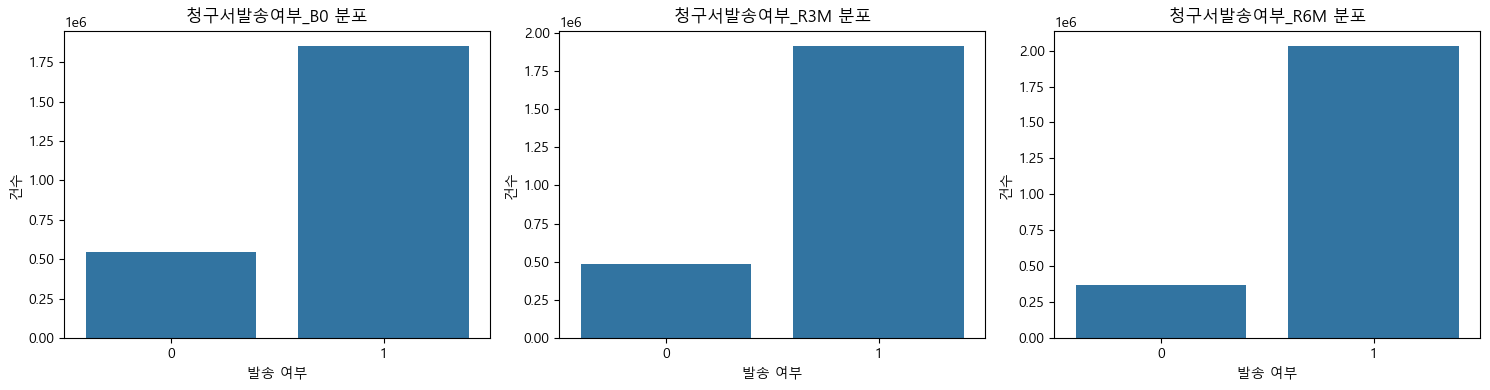

In [10]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 한글 폰트 및 마이너스 처리
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# bill_df 경고 방지용 복사
bill_df = bill_df.copy()

# countplot 실행 예시
send_cols = ["청구서발송여부_B0", "청구서발송여부_R3M", "청구서발송여부_R6M"]
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, col in enumerate(send_cols):
    sns.countplot(data=bill_df, x=col, ax=axes[i])
    axes[i].set_title(f"{col} 분포")
    axes[i].set_xlabel("발송 여부")
    axes[i].set_ylabel("건수")

plt.tight_layout()
plt.show()

### 청구 금액 비교

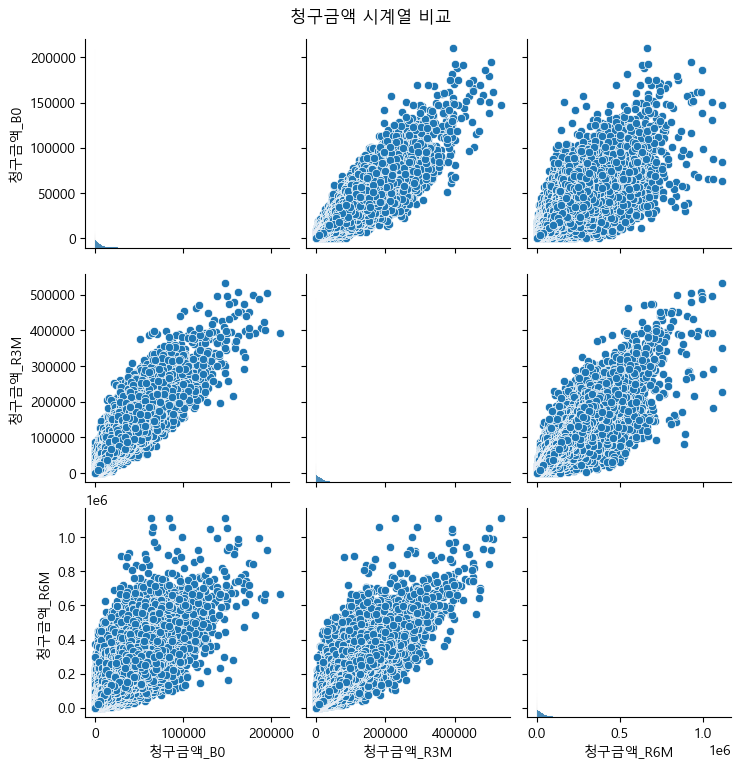

In [12]:
# 청구금액 분포 비교
amount_cols = ["청구금액_B0", "청구금액_R3M", "청구금액_R6M"]

# 혹시 수치형 변환 필요할 경우
for col in amount_cols:
    bill_df[col] = pd.to_numeric(bill_df[col], errors='coerce')

# pairplot으로 비교
sns.pairplot(bill_df[amount_cols].dropna())
plt.suptitle("청구금액 시계열 비교", y=1.02)
plt.show()

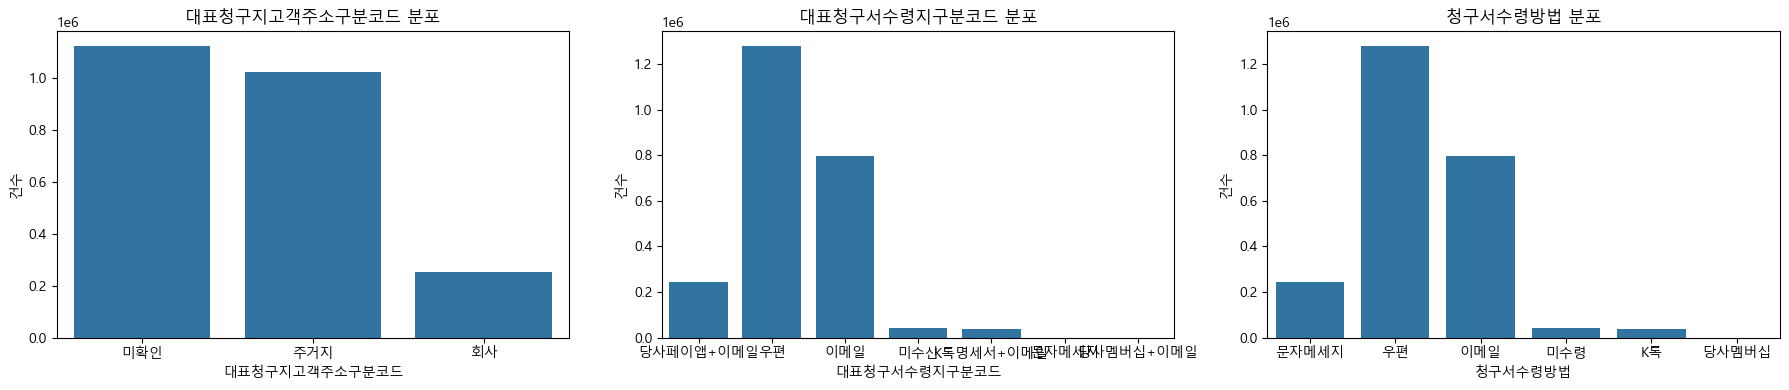

In [13]:
# 수령 관련 컬럼
category_cols = ["대표청구지고객주소구분코드", "대표청구서수령지구분코드", "청구서수령방법"]

# 각 컬럼의 countplot 출력
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

for i, col in enumerate(category_cols):
    sns.countplot(data=bill_df, x=col, ax=axes[i])
    axes[i].set_title(f"{col} 분포")
    axes[i].set_ylabel("건수")

plt.tight_layout()
plt.show()

### 청구서 발송 여부와의 세그먼트 관계 

In [15]:
# 더미 변수로 변환
# 분석용 복사본 생성
df_corr = bill_df_with_segment.copy()

# Segment를 더미 변수로 변환
segment_dummies = pd.get_dummies(df_corr["Segment"], prefix="Segment")

# 원본과 더미를 합치기
df_corr = pd.concat([df_corr, segment_dummies], axis=1)

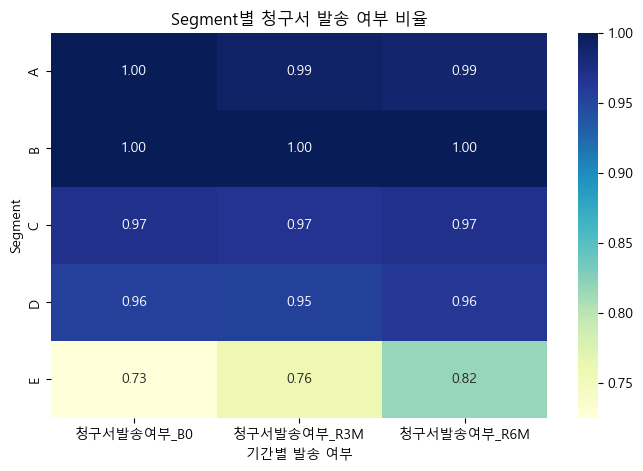

In [16]:
# Segment별 청구서발송여부 평균 (비율) 계산
segment_by_send = df_corr.groupby("Segment")[
    ["청구서발송여부_B0", "청구서발송여부_R3M", "청구서발송여부_R6M"]
].mean()

# 히트맵 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.heatmap(segment_by_send, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Segment별 청구서 발송 여부 비율")
plt.xlabel("기간별 발송 여부")
plt.ylabel("Segment")
plt.show()

### 📊 Segment별 청구서 발송 여부 분석 결과 요약

#### ✅ 주요 인사이트

- **Segment A, B**  
  - 전 기간에 걸쳐 청구서 발송률이 99~100% 수준으로 **지속적인 청구서 수령 고객층**으로 볼 수 있음  
  - 신뢰도 높은 **안정적인 우량 고객군**으로 판단 가능

- **Segment C, D**  
  - 청구서 발송률이 평균 95~97% 수준으로 일정하게 유지됨  
  - 상대적으로 **조금 더 유동적인 고객층**

- **Segment E**  
  - B0 시점에 73%로 가장 낮은 발송률을 보였으며  
  - 최근 R3M(76%), R6M(82%)으로 점차 회복세  
  - 과거에는 청구서 발송이 덜 이루어졌지만, **최근 개선되고 있는 추세**  
  - 마케팅 개입이나 발송 방식 변화의 영향을 받았을 가능성 있음

#### 🧩 인사이트 활용 방안
- Segment E는 변화 가능성이 있는 고객군으로, **디지털 청구서 전환 유도, 발송 방식 최적화 캠페인** 등  
  **타겟 마케팅 대상**으로 고려할 수 있음


In [18]:
# 청구금액 관련 컬럼 리스트
amount_columns = ["청구금액_B0", "청구금액_R3M", "청구금액_R6M"]

# Segment A~E 대상만 필터링
bill_df_ab = bill_df_with_segment[bill_df_with_segment['Segment'].isin(['A', 'B', 'C', 'D', 'E'])]

# 세그먼트별 평균 청구금액 계산 후 전치
ab_amount_mean = bill_df_ab.groupby("Segment")[amount_columns].mean().T

# 결과 보기 좋게 출력
from IPython.display import display
display(ab_amount_mean)

Segment,A,B,C,D,E
청구금액_B0,49514.364198,47600.666667,20001.545098,10703.868727,3022.291375
청구금액_R3M,151168.328189,148207.687500,61462.174896,33112.578759,9454.453713
청구금액_R6M,316939.458848,316174.256944,128408.240129,69963.942264,19778.687382


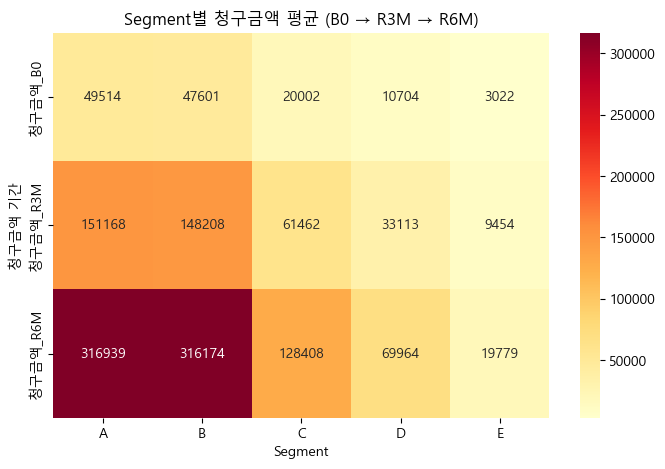

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# ab_amount_mean: 전치된 청구금액 평균 데이터프레임
plt.figure(figsize=(8, 5))
sns.heatmap(ab_amount_mean, annot=True, fmt=".0f", cmap="YlOrRd")

plt.title("Segment별 청구금액 평균 (B0 → R3M → R6M)")
plt.xlabel("Segment")
plt.ylabel("청구금액 기간")
plt.show()

### 💳 Segment별 청구금액 평균 분석 결과 요약

#### ✅ 전체 요약
- 청구금액은 전반적으로 시점이 과거(B0)에서 최근(R6M)으로 갈수록 **꾸준히 증가**하는 추세를 보임
- Segment 간 금액 순위 구조는 대부분 유지되며, **분포 패턴이 유사**한 양상을 나타냄

#### 📊 세그먼트별 청구금액 특성

- **Segment A, B**  
  - 모든 시점에서 가장 높은 청구금액을 보이는 **우량 고객군**
  - R6M 기준 30만 원 이상으로 타 세그먼트 대비 큰 차이

- **Segment C, D**  
  - 중간 수준의 청구금액을 보이며 점진적으로 증가하는 경향
  - 일정 수준의 소비활동이 꾸준히 유지되는 그룹

- **Segment E**  
  - 모든 시점에서 가장 낮은 금액대를 보임
  - R6M 기준 2만 원 미만 → **비활성 또는 유휴 고객군**으로 분류 가능

#### 🧩 인사이트 요약

- **청구금액_R3M만 대표로 사용해도 무방**할 정도로 시점별 구조가 유사
- 이후 분석 또는 모델링에서는 R3M 기준으로 단일화하여 **변수 축소 및 해석 용이성 향상 가능**


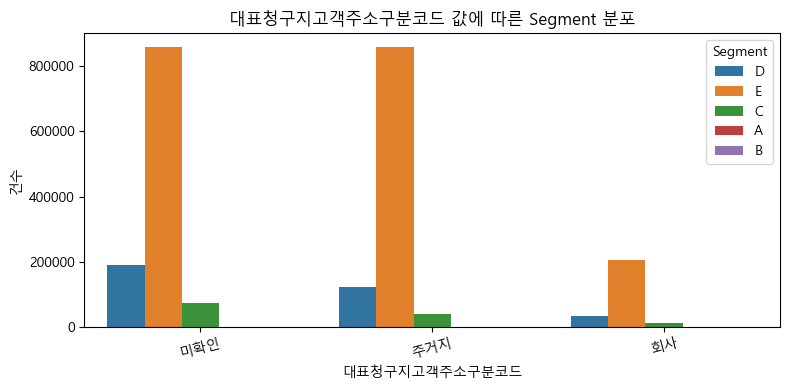

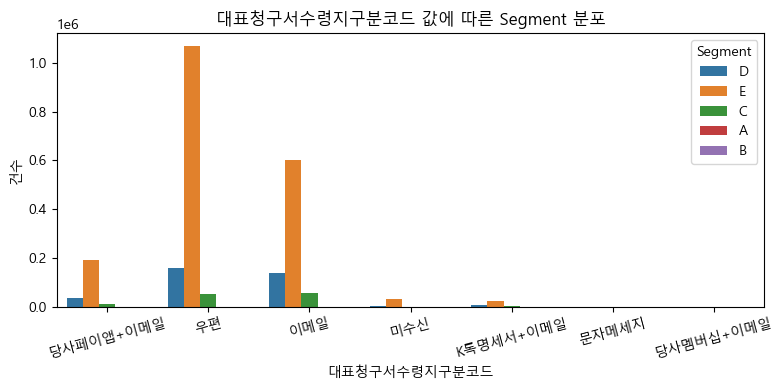

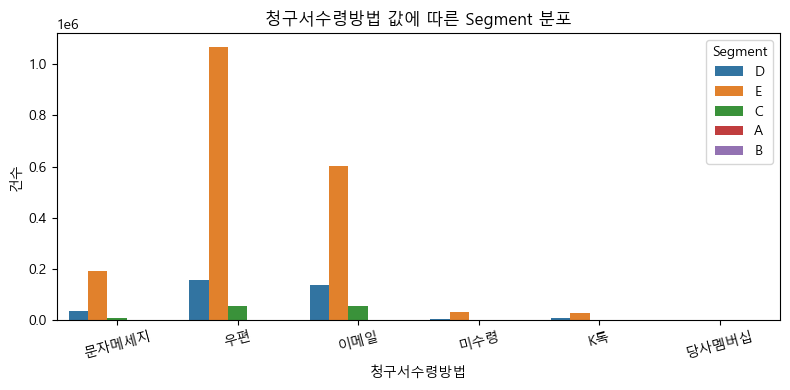

In [21]:
category_cols = [
    "대표청구지고객주소구분코드",
    "대표청구서수령지구분코드",
    "청구서수령방법"
]

import seaborn as sns
import matplotlib.pyplot as plt

category_cols = [
    "대표청구지고객주소구분코드",
    "대표청구서수령지구분코드",
    "청구서수령방법"
]

# 컬럼별 시각화
for col in category_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=bill_df_with_segment, x=col, hue="Segment")
    plt.title(f"{col} 값에 따른 Segment 분포")
    plt.xlabel(col)
    plt.ylabel("건수")
    plt.legend(title="Segment")
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()

### 🗂️ 변수 제거 판단 근거 (Segment 분류 기준)

다음 세 변수는 고객 세그먼트 분류에 기여도가 낮다고 판단되어 **제거 대상 변수**로 간주할 수 있습니다:

- `대표청구지고객주소구분코드`
- `대표청구서수령지구분코드`
- `청구서수령방법`

---

#### ✅ 제거 판단 근거

1. **Segment E 쏠림 현상**
   - 모든 값에서 Segment E가 압도적으로 많고,  
     다른 세그먼트(A~D)는 카테고리 값 간 비슷한 분포를 보임
   - 세그먼트를 구분하는 데 **변별력이 떨어지는 변수**

2. **카테고리 불균형 또는 정보 부족**
   - 예: `대표청구지고객주소구분코드`는 `"미확인"`이 매우 높은 비중 차지
   - 특정 카테고리값이 대부분을 차지하면 분석/모델 왜곡 가능성 존재

3. **세그먼트 간 차별성 없음**
   - 값에 따라 Segment 구성비가 거의 동일하거나 큰 차이가 없음
   - 이는 곧, **세그먼트 예측 모델에서 기여도가 낮다는 것**을 의미

---